In [1]:
import torch
import matplotlib.pyplot as plt

# Tools

In [2]:
def get_k_parameters(model):
    parameter = []
    for block in model.blocks:
        parameter.append(
            block.attn.attn_matrix.weight.data.abs()[384:768, :]
        )
    return torch.cat(parameter)

In [3]:
def get_q_parameters(model):
    parameter = []
    for block in model.blocks:
        parameter.append(
            block.attn.attn_matrix.weight.data.abs()[:384, :]
        )
    return torch.cat(parameter)

# Plots

tensor(18206)


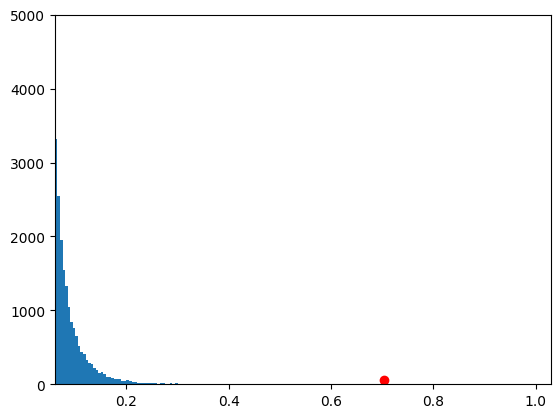

In [4]:
result = torch.load("results/1.1/masked_first/1.pt", map_location=torch.device('cpu'))
model = result["model"]
parameter = get_k_parameters(model).flatten()
print((parameter > 0.06).sum())
hist = torch.histogram(parameter[parameter > 0.06], bins=torch.tensor([0.0 + 0.005 * idx for idx in range(200)]))
plt.stairs(hist.hist.detach().numpy(), hist.bin_edges.detach().numpy(), fill=True)
plt.plot(parameter.max(), 60,'ro') 
plt.xlim([0.06, 1.03])
plt.ylim([0, 5_000])
plt.savefig("Parameter_K_1.1.jpg")
plt.show()

tensor(27224)


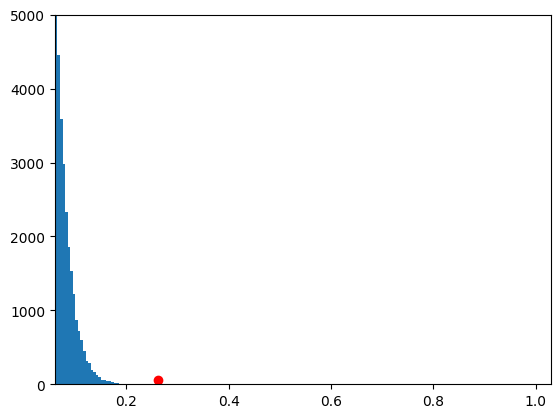

In [5]:
result = torch.load("results/2/masked_first/1.pt", map_location=torch.device('cpu'))
model = result["model"]
parameter = get_k_parameters(model).flatten()
print((parameter > 0.06).sum())
hist = torch.histogram(parameter[parameter > 0.06], bins=torch.tensor([0.0 + 0.005 * idx for idx in range(200)]))
plt.stairs(hist.hist.detach().numpy(), hist.bin_edges.detach().numpy(), fill=True)
plt.plot(parameter.max(), 60,'ro') 
plt.xlim([0.06, 1.03])
plt.ylim([0, 5_000])
plt.savefig("Parameter_K_2.jpg")
plt.show()

tensor(13964)


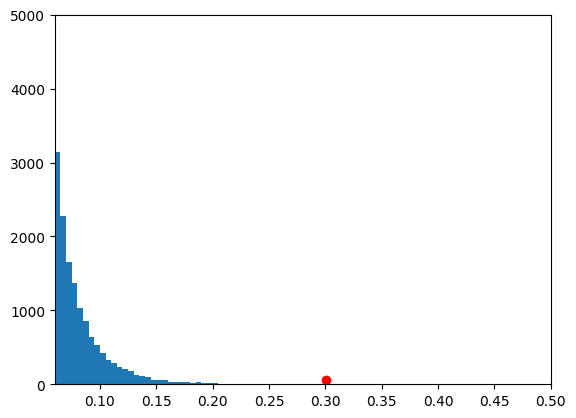

In [6]:
result = torch.load("results/1.1/masked_first/1.pt", map_location=torch.device('cpu'))
model = result["model"]
parameter = get_q_parameters(model).flatten()
print((parameter > 0.06).sum())
hist = torch.histogram(parameter[parameter > 0.06], bins=torch.tensor([0.06 + 0.005 * idx for idx in range(200)]))
plt.stairs(hist.hist.detach().numpy(), hist.bin_edges.detach().numpy(), fill=True)
plt.plot(parameter.max(), 60,'ro') 
plt.xlim([0.06, 0.5])
plt.ylim([0, 5_000])
plt.savefig("Parameter_Q_1.1.jpg")
plt.show()

tensor(14654)


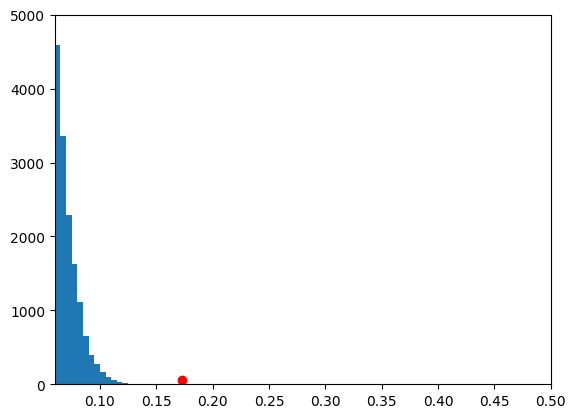

In [7]:
result = torch.load("results/2/masked_first/1.pt", map_location=torch.device('cpu'))
model = result["model"]
parameter = get_q_parameters(model).flatten()
print((parameter > 0.06).sum())
hist = torch.histogram(parameter, bins=torch.tensor([0.06 + 0.005 * idx for idx in range(200)]))
plt.stairs(hist.hist.detach().numpy(), hist.bin_edges.detach().numpy(), fill=True)
plt.plot(parameter.max(), 60,'ro') 
plt.xlim([0.06, 0.5])
plt.ylim([0, 5_000])
plt.savefig("Parameter_Q_2.jpg")
plt.show()